In [68]:
import pandas as pd
url_original = "../data/raw/productivity-statistics-1978-2022.csv"
dataset = pd.read_csv(url_original)
columnas_numericas = dataset.select_dtypes(include='number')

valor_mitad = dataset.count().max() // 2
dataset.dropna(axis=1, thresh=valor_mitad, inplace=True)
dataset.dropna(inplace=True)
def outlines(columnas_numericas):
    menor, mayor = 0.25, 0.75
    quant_col  = columnas_numericas.quantile([menor, mayor])
    columnas_numericas = columnas_numericas.apply(lambda valor: valor[(valor > quant_col.loc[menor, valor.name]) & (valor < quant_col.loc[mayor, valor.name])], axis=0)
outlines(columnas_numericas)
dataset.drop(dataset[(dataset['Data_value']) <= 0].index, axis=0, inplace=True)
print(dataset['UNITS'].head(100))


0      Index
1      Index
2      Index
3      Index
4      Index
       ...  
115    Index
116    Index
117    Index
118    Index
119    Index
Name: UNITS, Length: 100, dtype: object


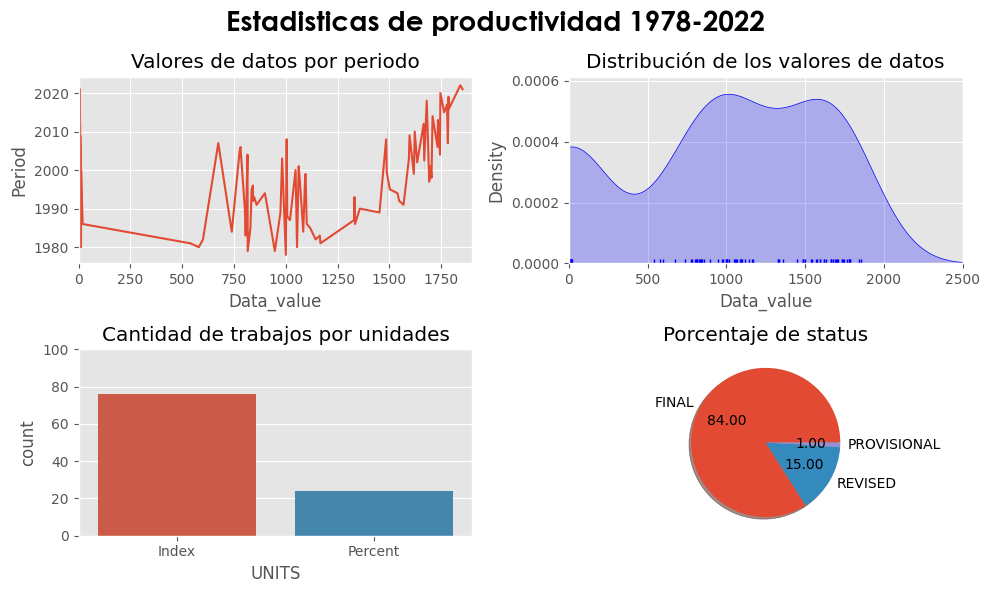

In [71]:
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")

dataset = dataset.head(100)

def graficar():
    """Graficar las estadisticas de productividad"""
    font = "Century Gothic"
    values_pie = dataset['STATUS'].value_counts()
    labels_pie = dataset['STATUS'].value_counts().index
    
    fig = plt.figure('Estadísticas de productividad', figsize=(10, 6))
    axes = fig.subplots(nrows=2, ncols=2)
    fig.suptitle("Estadísticas de productividad 1978-2022", fontsize=20, fontweight='bold', fontname=font)
    axes[0, 0].set(title="Valores de datos por periodo", xlim=(0, 1900))
    axes[0, 1].set(title="Distribución de los valores de datos", xlim=(0, 2500))
    axes[1, 0].set(title="Cantidad de trabajos por unidades", ylim=(0, 100))
    axes[1, 1].set(title="Porcentaje de status")
    
    sns.lineplot(data=dataset, x='Data_value', y='Period', ax=axes[0, 0])
    
    sns.kdeplot(dataset['Data_value'], fill=True, color='blue', ax=axes[0, 1])
    sns.rugplot(dataset['Data_value'], color='blue', ax=axes[0, 1])
    
    sns.countplot(data=dataset, x='UNITS', ax=axes[1, 0])
    
    axes[1, 1].pie(x=values_pie, labels=labels_pie, autopct='%.2f', shadow=True)
    
    fig.tight_layout()
    plt.show()
graficar()